# `L3`: Lecture 3: Graphical User Interfaces & Raspberry Pi 

In the KT2505 course, we are going to work with the Raspberry Pi to set up a Portable Balance Lab (PBL). This lecture provides an introduction on the Raspberry Pi. Interfacing the sensory set-up with a (simple) interface will be helpfull during your measurements.The first section in this lecture provides an introduction on how to build a simple GUI with Python.


__Outline:__
  * [1. Graphical User Interface](#Ch1)
      * [1.1 Guizero](#Ch11)
      * [1.2 Create an interface](#Ch12)
      * [1.3 Example: Temperature converter](#Ch13)
      * [1.4 Pop-Ups](#Ch14)
          * [1.4.1 Example: yes no question](#Ch141)
          * [1.4.2 Example: 'Select file'- dialog box](#Ch142)
          * [1.4.3 Test yourself example: 'Edit and save file'- dialog box](#Ch143)
          * [1.4.4 Menus](#Ch144)      
  * [2. What is the Raspberry Pi?](#Ch2)
      * [2.1 What can you do with a Raspberry Pi? ](#Ch21)
  * [3. Interfacing hardware](#Ch3)
      * [3.1 GPIO Pin Connections](#Ch31)
          * [3.1.1 Pin functions](#Ch311)
          * [3.1.2 Serial Interface Pins](#Ch312)
          * [3.1.3 Power Pins](#Ch313)
          * [3.1.4 Hat Pins](#Ch314)
          * [3.1.5 Breadboarding with Jumper Wires](#Ch315)
      * [3.2 Digital Outputs](#Ch32)
      * [3.3 Analog Outputs - Pulse Width Modulation](#Ch33)
      * [3.4 Digital Inputs](#Ch34)
      * [3.5 Analog Inputs](#Ch35)
          * [3.5.1 Measuring resistance](#Ch351)
 

## 1. Graphical User Interface  <a class="anchor" id="Ch1"></a>

In this lecture we are going to create graphical user interfaces (GUIs). These will come in use when setting up and running your experiments.
 
### 1.1 Guizero <a class="anchor" id="Ch11"></a>

There are many Python libraries for creating GUIs, but in this lecture we are going to work with `guizero`, which was specifically created for the Raspberry Pi.

The guizero package is pre-installed on all Rapberry Pi's. However, if we want to use the same module on our own machine we need to install the module first.
 
#### Windows

1. Open a command prompt by clicking Start > Windows System > Command Prompt, or by typing 'command' into the start menu's search bar.

2. Type this command and press enter:

```bash
    pip3 install guizero
```


#### Mac

1. Open a terminal window by clicking Applications > Utilities > Terminal, or by typing 'terminal' into the desktop's search bar.
2. Type this command and press enter:

```bash
    pip3 install guizero
```

#### Linux

1. Open a terminal
2. Install tkinter using your distribution's package manager, e.g. `sudo apt install python3-tk`
3. Install guizero using pip by typing `pip3 install guizero` or `sudo pip3 install guizero` if you don't have superuser rights
 
 (Help: https://lawsie.github.io/guizero/)
 
#### Raspberry Pi
 
 If you are working on the Raspberry Pi, make sure the package is up to date by updating it:
 
1. Open the terminal on the Raspberry Pi. The terminal icon looks like: 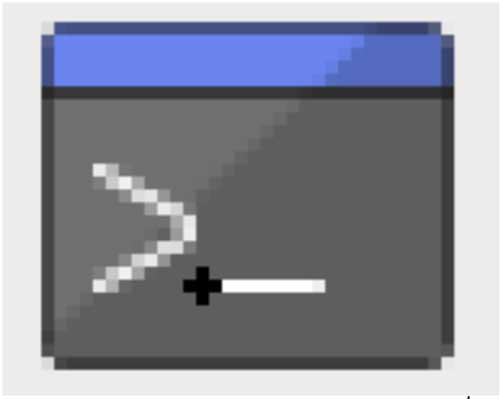 
2. Run the following command:

```bash
    sudo pip3 install --upgrade guizero
```
    
#### Troubleshooting

* If 'command prompt' can not be found, try to find 'Anaconda prompt' and follow the steps

* If 'pip3' does not work but results in error _'pip3 is not recognized as an internal or external command, operable program or batch file.'_ , try `pip install guizero`
    
### 1.2 Create an interface <a class="anchor" id="Ch12"></a>

Let's run a first example with the `guizero` package:

In [ ]:
from guizero import App, Text

app = App()
Text(app, text="KT2505")
app.display()

We import two things from the `guizero` library: `App` represents the application window and `Text` represents a text label that we are going to use to hold our 'KT2505' text. A new `App` is created and assigned to the variable `app`. We then make a `Text`, passing it `app` as its first parameter so that the text label will appear inside the application window. Finally, we call `app.display()` to make the window visible. You can just close the window by clicking on the _x_ in the top right, or stop the program.

### 1.3 Example: Temperature converter <a class="anchor" id="Ch13"></a>

 To get started with guizero, you'll gradually build up an application that provides a GUI for temperature conversion. This application will use the `converter` module that we created in Lecture 2. The first step is to create the following interface, but it doesn't function yet:

![image.png](images/temp_conv.png)
 

In [ ]:
# we need several things from guizero, so we import everything (*):
from guizero import *

app = App(title="Temp Converter", layout="grid", width=300, height=100)

Text(app, text="degrees C", grid=[0,0])
degCfield = TextBox(app, grid=[1,0], width="fill")  #"fill" enlarges the control to fill the cell

Text(app, text="degrees F", grid =[0,1])
degFfield = Text(app, grid=[1,1])

button = PushButton(app, text="Convert", grid=[0,2])

app.display()

After the import, we first create an `App`, like we did before but this time it has some additional parameters: a `title` which will appear in the window title area and the starting window size (`width` and `height`) in pixels.

The other parameter (`layout ='grid'`) specifies that we are going to lay out the components in the window in a grid. This means that for each component we add to the screen, we will have to specify its grid position. You can see this in the first Text label (degrees C), which specifies a grid position of [0,0], which means top left.

By using a grid layout we can line up the fields into columns and rows. Here, the grid layout has three rows and two colomns. The first row contains the label and the field to enter temperature, the second row has a label and a field to show the result in Fahrenheit, and the third row contains the button.

The example above has a button, but the button doesn't do anything yet. To create a functioning interface, check out the following code:

(this code uses the `converters.py` module that you created in the [previous lecture](../L2_PythonClassesAndWritingFiles/L2_PythonClassesAndWritingFiles.ipynb))


In [ ]:
from guizero import *

# now load the converter module from the previous lecture
from converters import ScaleAndOffsetConverter

c_to_f_conv = ScaleAndOffsetConverter('C','F',1.8,32)

# We need a function that converts the input in C to the output in F. We use the module for this
def convert():
    c = float(degCfield.value)
    degFfield.value = str(c_to_f_conv.convert(c))

app = App(title="Temp Converter", layout="grid", width=300, height=100)
Text(app, text="degrees C", grid=[0,0])
degCfield = TextBox(app, grid=[1,0], width="fill") 

Text(app, text="degrees F", grid=[0,1])
degFfield = Text(app, grid=[1,1])

# here we now need to add a command to convert the input. 
# This refers to the def specified above
button = PushButton(app, text="Convert", grid=[0,2], command=convert)

app.display()

#### 1.3.1 Other GUI Widgets
In the temperature converter we just used text fields and labels. There are of course many other controls you can use in your interface. All documentation on the controls can be found on the official [guizero website](https://lawsie.github.io/guizero/). 
To get you started, the following example contains many of the controls:

![image.png](images/control_dump.png)

In [ ]:
from guizero import *

app = App(title="Control Dump", layout="grid", width=400, height=400)

# Row 0
Text(app, text="label", grid=[0,0])
TextBox(app, grid=[1,0])
PushButton(app, text="Button", grid=[2,0])

# Row 1
CheckBox(app, text="Checkbox", grid=[0,1])
ListBox(app, items=["Lab 1", "Lab 2", "Lab 3"], grid=[1,1])
Combo(app, options=["Lab 1", "Lab 2", "Lab 3"], grid=[2,1])

# Row 2
ButtonGroup(app, options=["Neuro","Sign"], selected="Sign", grid=[0,2])
Slider(app, start=0, end=10, grid=[1,2])
Picture(app, image="images/TU_delft-logo.jpg", width=200, height=80, grid=[1,3])

app.display()


### 1.4 Pop-Ups <a class="anchor" id="Ch14"></a>

There will be situations where you'd like a pop-up for your program, for example to ask a question (save: yes or no?) or to select a file to open. There is a [big selection of pop-ups](https://lawsie.github.io/guizero/) that you can use from guizero. We have provided some usefull examples here. 

##### 1.4.1 Example: yes no question <a class="anchor" id="Ch141"></a>

![image.png](images/yes_no.png)

In [ ]:
from guizero import *

def ask():
    if yesno("Question", "Yes or No?"):
        info("Result","You clicked Yes")
    else:
        warn("Result","You clicked no") # the difference between 'info' and 'warn': warn shows a warning icon
        
app = App(title="Pop-Ups", width=200, height=100)
button = PushButton(app, text="Click me", command=ask)
app.display()


##### 1.4.2 Example: 'Select file'- dialog box  <a class="anchor" id="Ch142"></a>

In [ ]:
from guizero import *

def ask():
    filename = select_file(title="Choose a text file", filetypes=[["*.md","*.txt"]])
    if not filename:
        print("No file selected")
    else:
        read_file(filename)
        
def read_file(filename):
    f = open(filename)
    text = f.read()
    f.close()
    text_area.value = text
    
app = App(width=600, height=200)
text_area = TextBox(app, width="fill", height=10, multiline=True, scrollbar=True)
button = PushButton(app, text="Open", command=ask)
app.display()
            

##### 1.4.3 ❓ Test Yourself: 'Edit and save file'- dialog box  <a class="anchor" id="Ch143"></a>

This app lets you open and read a text file. You can edit the text, however you can't save it yet. Try to add a save button to save the edits you make.

1. Open file: `"notes_experiments.txt"`
2. Make some changes to the file and save it again

In [ ]:
from guizero import *

def ask():
    filename = select_file(title="Choose a text file", filetypes=[["*.md","*.txt"]])
    if not filename:
        print("No file selected")
    else:
        read_file(filename)
        
def read_file(filename):
    f = open(filename)
    text = f.read()
    f.close()
    text_area.value = text
    
def save_file():
    
    #❓ test yourself: write your own code here
    
   
    
app = App(width=600, height=200)
text_area = TextBox(app, width="fill", height=10, multiline=True, scrollbar=True)
button = PushButton(app, text="Open", command=ask, align="left")
button2 = PushButton(app, text="Save", command=save_file, align="right")
app.display()

#### 1.4.4 Menus  <a class="anchor" id="Ch144"></a>

The guizero also provides a way of adding [menus](https://lawsie.github.io/guizero/menubar/) to the application. Check out the website for examples!

## 2. What is the Raspberry Pi? <a class="anchor" id="Ch2"></a>

The Raspberry Pi is a computer that runs the Linux operating system. It has USB sockets you can plug a keyboard and mouse into
and HDMI (High-Definition Multimedia Interface) video output you can connect a TV or monitor into. 
When Raspberry Pi boots up, you get the Linux desktop:

![image-3.png](images/pixel1.jpg)

This really is a proper computer, able to run an office suite, video playback capabilities, games, and the lot. It’s not Microsoft Windows; instead, it is Windows’ open source rival Linux (Debian Linux), and the windowing environment is called Pixel.

It’s small (the size of a credit card) and extremely affordable. Part of the reason for this low cost is that some components are not included with the board or are optional extras. For instance, it does not come in a case to protect it—it is just a bare board. Nor does it come with a power supply, so you will need to find yourself a 5V micro-USB power supply, much like you would use to charge a phone (the power supply capable of supplying 2A and 3A is recommended). 

### 2.1 What can you do with a Raspberry Pi? <a class="anchor" id="Ch21"></a>

You can do pretty much anything on a Raspberry Pi that you can on any other Linux desktop computer, with a few limitations. The Raspberry Pi uses a micro-SD card in place of a hard disk. The older Raspberry Pi models A and B use a full-size SD card, although you can plug in a USB hard disk. 

In [ ]:
from IPython.display import YouTubeVideo

youtube_video = YouTubeVideo('eZ74x6dVYes')

# display youtube video
display(youtube_video)


![image.png](images/RP4.png)
###### Figure: Raspberry Pi 4

![image-2.png](images/RPzero.png)
###### Figure: Raspberry Pi Zero

The RJ-45 Ethernet connector is to plug your Raspberry Pi directly into a local network. the Raspberry Pi 4 also has a built-in Wi-Fi connector. Immediately above the Ethernet socket you’ll find two pairs of USB sockets. You can plug a keyboard, mouse, or external hard disks into the board. In the bottom-center of the figure you’ll find an audio socket that provides a stereo analog signal for headphones or powered speakers. This socket also provides a composite video signal. The HDMI connector is also sound capable.

At the top of the Pi are two rows of pins. These are called GPIO (General Purpose Input/Output) pins, and they allow the Raspberry Pi to be connected to custom electronics. Users of the Arduino and other microcontroller boards will be used to the idea of GPIO pins.

The Raspberry Pi has a micro-SD card slot underneath the board. This SD card needs to be at least 8GB - 32 GB in size. It contains the computer’s operating system as well as the file system in which you can store any documents you create. 
Because no disk is built into your Raspberry Pi, this card is effectively your computer, so you could take it out and put it in a different Raspberry Pi and all your stuff would be there.

Below the micro-SD card is the USB-C socket. This is used to supply power to the Raspberry Pi. Therefore, you will need a power supply with a micro-USB connector on the end. This is the same type of connector used by many mobile phones. Do, however, check that it is capable of supplying at least 2.5A; otherwise, your Raspberry Pi may behave erratically.

The big square chip in the center of the board is where all the action occurs. This is Broadcom’s “System on a Chip” and includes 1, 4, or 8GB of memory as well as the graphics and general-purpose processors
that drive the Raspberry Pi.

You may also have noticed flat cable connectors on the Pi. The connector on the far left is for an LCD display and the connector bottom-center is for the special Raspberry Pi Camera Module.

## 3. Interfacing hardware <a class="anchor" id="Ch3"></a>

The Raspberry Pi has a double row of pins on one side of it. These pins are called the GPIO connector (General Purpose Input/Output) and allow you to connect electronic hardware to the Pi as an alternative to using the USB port.

The maker and education communities have already started producing expansion and prototyping boards you can attach to your Pi so you can add your own electronics. This includes everything from simple temperature sensors to relays to IMUs, EMG, force sensors, cameras, or robot controls.

In this part, we explore the various ways of connecting the Pi to electronic devices using the GPIO. 

### 3.1 GPIO Pin Connections <a class="anchor" id="Ch31"></a>

All versions of the Raspberry Pi since the Raspberry Pi 2 have two rows of 20 pins, making 40 pins in total. The template of the GPIO pin layout is as follows:

![image.png](images/GPIOs.png)

#### 3.1.1 Pin functions <a class="anchor" id="Ch311"></a>

The pins labeled GPIO can all be used as general-purpose input/output pins. In other words, any one of them can first be set to either an input or an output. If the pin is set to be an input, you can then test to see whether the pin is set to a “1” (above about 1.7V) or a “0” (below 1.7V). Note that all the GPIO pins are 3.3V pins and connecting them to higher voltages than that could damage your Raspberry Pi. When set to be an output, the pin can be either 0V or 3.3V (logical 0 or 1). Pins can only supply or sink a small amount of current (assume 3mA to be safe), so they can just light an LED if you use a high value resistor (say, 470Ω or higher).

#### 3.1.2 Serial Interface Pins <a class="anchor" id="Ch312"></a>

You will notice that some of the GPIO pins have other letters after their names. Those pins can be used as normal GPIO pins, but also have some special purpose. For example, pins 2 and 3 have the extra names of SDA and SCL. These are the clock and data lines, respectively, for a serial bus type called I2C that is popular for communicating with peripherals such as temperature sensors, LCD displays, and the like.

GPIO pins 14 and 15 also double as the TXD and RXT (Transmit and Receive) pins for the Raspberry Pi’s serial port. Yet another type of serial communication is possible through GPIO 9 to 11 (MISO, MOSI, and SCLK). This type of serial interface is called SPI.

#### 3.1.3 Power Pins <a class="anchor" id="Ch313"></a>

Both GPIO connectors are sprinkled with pins labeled GND (ground). These pins are all connected to the Raspberry Pi’s ground or zero volts. Other power pins are also provided for 3.3V and 5V. You will often use these pins when hooking up external electronics to the Raspberry Pi.

#### 3.1.4 Hat Pins <a class="anchor" id="Ch314"></a>

Two special pins, only available on the 40-pin variant of the Raspberry Pi, are ID_SD and ID_SC. These are reserved for an advanced interface standard that you can use with the Raspberry Pi 2, B+ and A+. The standard is called HAT (Hardware Attached to Top). This standard does not in any way stop you just using GPIO pins directly; however, interface boards that conform to the HAT standard can call themselves HATs and have the advantage that a HAT must contain a little EEPROM (Electrically Erasable Programmable Read-Only Memory) chip on it that is used to identify the HAT so that ultimately the Raspberry Pi could auto-install necessary software. The pins ID_SD and ID_SC are used to communicate with a HAT EEPROM.

#### 3.1.5 Breadboarding with Jumper Wires  <a class="anchor" id="Ch315"></a>

Solderless breadboard, often just called breadboard, is a great way of connecting electronics to a Raspberry Pi. There is no soldering to do—you just push electronic components into the breadboard and then connect them to your Raspberry Pi GPIO connector using either special jumper wires.

### 3.2 Digital Outputs <a class="anchor" id="Ch32"></a>

The GPIO pins can be used to generate a digital output signal, for example to switch a light on and off. To access the GPIO pins, you need to import a library called `RPi.GPIO`. This library is included with Raspbian, so you do not need to install it. You just need to import it into the console by entering the command below:
   
```python
    import gpiozero
```

When you have a LED connected to the Raspberry Pi, you need to specify the GPIO pin number and whether the pin is an input or an output:

```python
    led = gpiozero.LED(18)
```
    
    
### 3.3 Analog Outputs - Pulse Width Modulation <a class="anchor" id="Ch33"></a>

The method used by the `gpiozero` library to produce an “analog” output is called Pulse Width Modulation (PWM). The GPIO pin actually uses a digital output, but generates a series of pulses. The width of the pulses are varied. The larger the proportion of the time that the pulse stays high, the greater the power delivered to the output, and hence the brighter the LED.

![image-2.png](images/pulse_modulation.png)


The proportion of the time that the pulse is HIGH is called the duty and this is often expressed as a percentage. Even though the LED is actually turning on and off, it happens so fast that your eye is just fooled into thinking the LED is brighter or dimmer depending on the length of the PWM pulse.

### 3.4 Digital Inputs <a class="anchor" id="Ch34"></a>

Where an LED is the most likely thing to be connected to a digital output, a switch is probably the most likely thing to be connected to a digital input.

### 3.5 Analog Inputs <a class="anchor" id="Ch35"></a>

Even the Raspberry Pi does not have analog inputs, that is inputs that can measure a voltage rather than simply tell if it is above or below a threshold that indicates the input is high or low. A lot of analog sensors provide an output voltage that is proportional to the thing they are measuring. So, for example, a temperature sensor chip such as the TMP36 has an output pin whose voltage varies depending on the temperature. The only way to use such a sensor with the Raspberry Pi is to use an __ADC (Analog to Digital Convertor)__ chip.

However, many sensors are resistive. That is, their resistance changes with the thing they are measuring. A thermistor’s resistance changes with temperature and a photoresistor’s resistance varies depending on the amount of light falling on it. Other types of resistive sensors include gas sensors, strain sensors, and even resistive touch screens. These “resistive” sensors can be used with a Raspberry Pi by timing how long it takes for current to flow through the resistive sensor and charge up a capacitor to the extent that it crosses the threshold of a digital input so that the input counts as HIGH rather than LOW

#### 3.5.1 measuring resistance <a class="anchor" id="Ch351"></a>

Check out the following use case:
![image-3.png](images/resistance_setup.png)

To understand how this works, it can help to think of the capacitor as a water tank, the wires as pipes, and the resistors and the photoresistor as faucets that restrict the flow of water in the pipes. First, the capacitor is emptied of charge (the tank is emptied of water) by setting pin 23 to be an output and low. The charge then drains out of the capacitor through R2. R2 is there to make sure the charge doesn’t flow out and into the Pi so fast that it damages the GPIO pin. Next, pin 23 is effectively disconnected by setting it to be an input and pin 18 is set high (3.3V) so that the capacitor starts to fill through both the fixed resistor R1 and the photoresistor. The voltage at the capacitor will then start to rise as the capacitor fills. The capacitor will fill faster the lower the resistance of the photoresistor. This voltage is now monitored by pin 23 now acting as an input until the input goes high at about 1.65V (half of 3.3V). The time taken for this to happen is measured and can then be used to calculate the resistance of the photoresistor, which is an indication of the light level.

![image-5.png](images/oscilloscope.png)

The figure above a) shows an oscilloscope trace of the voltage at pin 23 as the capacitor charges. The horizontal axis is time and the vertical axis volts, b) shows the same thing but with the photoresistor covered so that it is darker (and higher resistance). As you can see, it takes perhaps three times as long for the voltage to rise in the dark.

When a capacitor is charged through a resistor, the time taken for the capacitor voltage to rise to 0.632 of the charging voltage is called the time constant (T). By the miracle of physics, T is also equal to the value of resistance times the capacitance. So, you can work out T from the time taken to charge to 1.65V (t) using the equation:

    T = t*3.3*0.632

This is because we know how long it got to 1.65V we just need to scale that up a bit to see how long it would take to get to 3.33.3 × 0.632 = 2.09V. You now have a definite value for T.
Now you also know that:

    T = (R+R1)xC
    
where R is the photoresistor’s resistance. Rearranging these, you get:

    R = (T/C)-R1
    
Which is the value of resistance of the photoresistor.

__Sources:__
* Monk,Simon, Programming the Raspberry Pi, Getting Started with Python